In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [5]:
df_train = pd.read_csv("../../Data/Train.csv")
df_test = pd.read_csv("../../Data/Test.csv")

In [6]:
df_train.columns

Index(['Unnamed: 0', 'text', 'source', 'prompt_id', 'text_length',
       'word_count', 'label', 'gpt-neo-125m-text_ppl',
       'gpt-neo-125m-max_sent_ppl', 'gpt-neo-125m-sent_ppl_avg',
       'gpt-neo-125m-sent_ppl_std', 'gpt-neo-125m-max_step_ppl',
       'gpt-neo-125m-step_ppl_avg', 'gpt-neo-125m-step_ppl_std',
       'gpt-neo-125m-rank_0', 'gpt-neo-125m-rank_10', 'gpt-neo-125m-rank_100',
       'gpt-neo-125m-rank_1000', 'gpt2-large-text_ppl',
       'gpt2-large-max_sent_ppl', 'gpt2-large-sent_ppl_avg',
       'gpt2-large-sent_ppl_std', 'gpt2-large-max_step_ppl',
       'gpt2-large-step_ppl_avg', 'gpt2-large-step_ppl_std',
       'gpt2-large-rank_0', 'gpt2-large-rank_10', 'gpt2-large-rank_100',
       'gpt2-large-rank_1000'],
      dtype='object')

In [7]:
x_train = df_train.drop(['Unnamed: 0','text', 'source', 'prompt_id', 'text_length', 'word_count', 'label'], axis = 1)

y_train = df_train[['label']]

x_test = df_test.drop(['Unnamed: 0','text', 'source', 'prompt_id', 'text_length', 'word_count', 'label'], axis = 1)

y_test = df_test[['label']]


In [8]:
xgb     = XGBClassifier()
lgb     = LGBMClassifier()
cat     = CatBoostClassifier()
rfr     = RandomForestClassifier()
clf     = VotingClassifier(
    n_jobs=-1,
    voting='soft',
    estimators=[('xgb', xgb), ('lgb', lgb), ('cat', cat), ('rfr', rfr)]
).fit(x_train, y_train)

/Users/t-andrew.widjaya/Documents/Thesis/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/t-andrew.widjaya/Documents/Thesis/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 215206, number of negative: 169144
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5394
[LightGBM] [Info] Number of data points in the train set: 384350, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.559922 -> initscore=0.240845
[LightGBM] [Info] Start training from score 0.240845


In [9]:
y_pred = clf.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.89      5000
           1       0.86      0.93      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



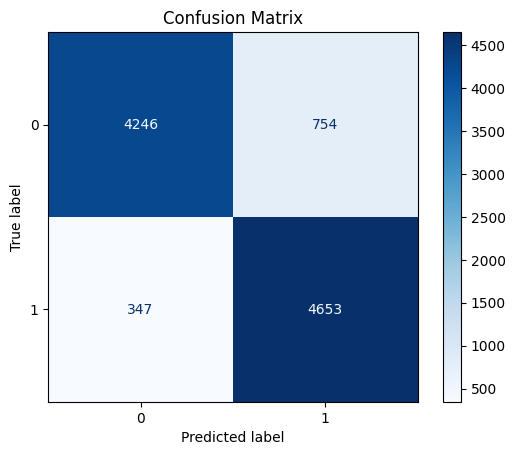

In [10]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")  # Use a color map for visualization
plt.title("Confusion Matrix")
plt.show()

In [11]:
# Create a consolidated DataFrame for misclassification analysis
df_test['predicted_label'] = y_pred
df_test['actual_label'] = y_test.values
df_test['is_misclassified'] = df_test['actual_label'] != df_test['predicted_label']

# Add source and misclassification info into a new DataFrame
misclassified_df = df_test[df_test['is_misclassified']].copy()

In [12]:
misclassified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1101 entries, 1 to 9992
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1101 non-null   int64  
 1   text                       1101 non-null   object 
 2   source                     1101 non-null   object 
 3   prompt_id                  1101 non-null   int64  
 4   text_length                1101 non-null   int64  
 5   word_count                 1101 non-null   int64  
 6   label                      1101 non-null   int64  
 7   gpt-neo-125m-text_ppl      1101 non-null   float64
 8   gpt-neo-125m-max_sent_ppl  1101 non-null   float64
 9   gpt-neo-125m-sent_ppl_avg  1101 non-null   float64
 10  gpt-neo-125m-sent_ppl_std  1101 non-null   float64
 11  gpt-neo-125m-max_step_ppl  1101 non-null   float64
 12  gpt-neo-125m-step_ppl_avg  1101 non-null   float64
 13  gpt-neo-125m-step_ppl_std  1101 non-null   float64
 1

/var/folders/12/2d3ld4y93ld9jm9rf8f_q5fw0000gq/T/ipykernel_37837/2372682568.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_counts.index, y=group_counts.values, palette='pastel')


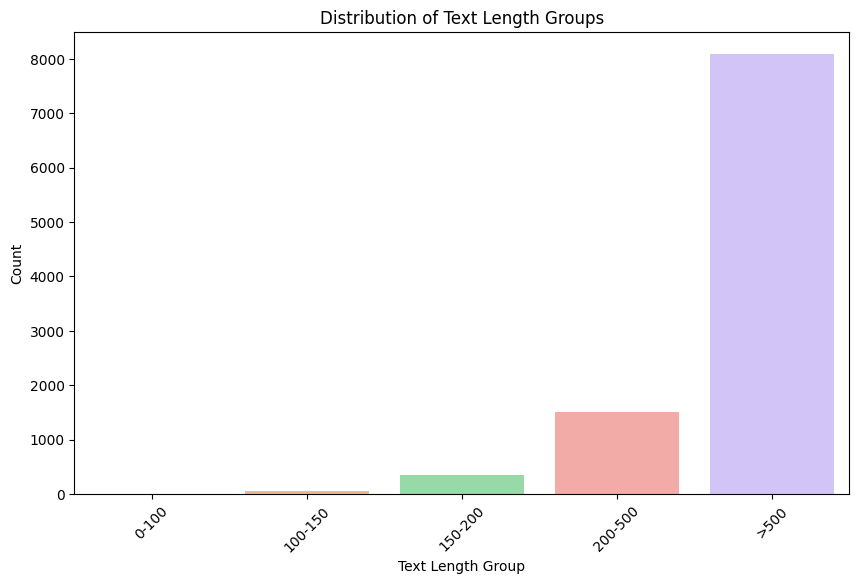

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define bins and labels
bins = [0, 100, 150, 200, 500, float('inf')]
labels = ['0-100', '100-150', '150-200', '200-500', '>500']

# Group text_length into bins
misclassified_df['length_group'] = pd.cut(misclassified_df['text_length'], bins=bins, labels=labels, right=False)

# Count the number of occurrences in each group
group_counts = misclassified_df['length_group'].value_counts().sort_index()

# Plot the distribution as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=group_counts.index, y=group_counts.values, palette='pastel')

# Customize the plot
plt.title("Distribution of Text Length Groups")
plt.xlabel("Text Length Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pickle
with open('FinalModel.pkl', 'wb') as fp:
    pickle.dump(clf, fp)

: 